In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ

from utils import *

%matplotlib notebook

<IPython.core.display.Javascript object>


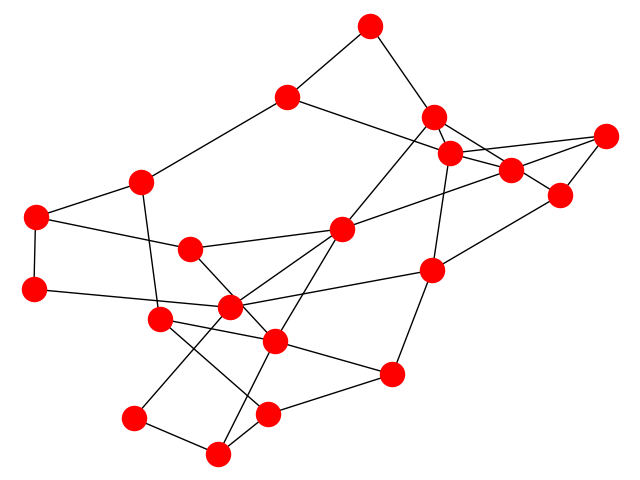

In [2]:
%matplotlib notebook
G = nx.newman_watts_strogatz_graph(20, 2, 0.5)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, pos = pos)

In [3]:
B, v, w = compute_eig_projection(G)

<IPython.core.display.Javascript object>


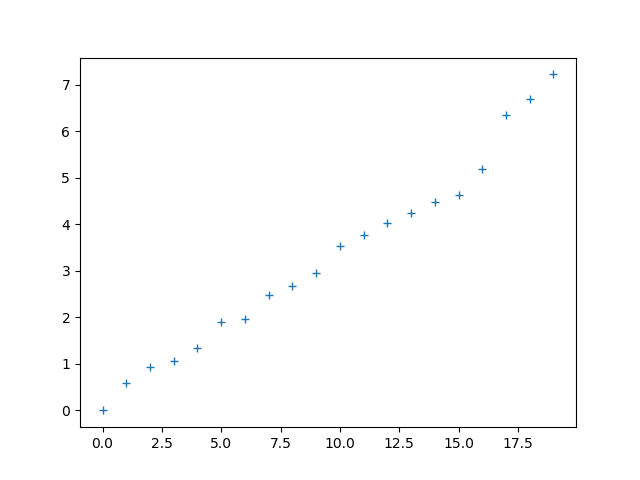

In [4]:


plt.figure()
plt.plot(w,'+')


<IPython.core.display.Javascript object>


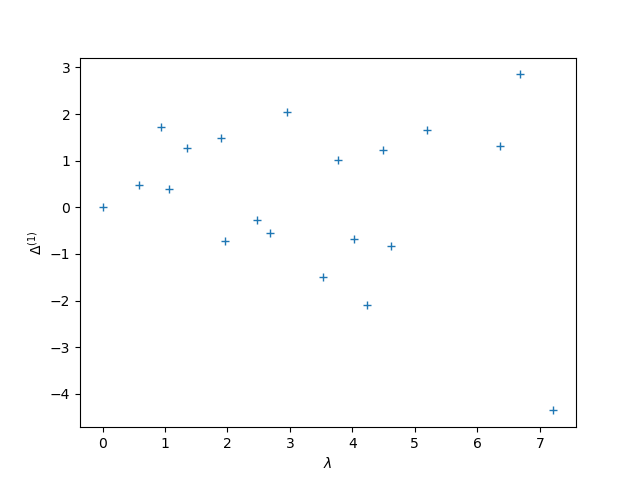

<IPython.core.display.Javascript object>


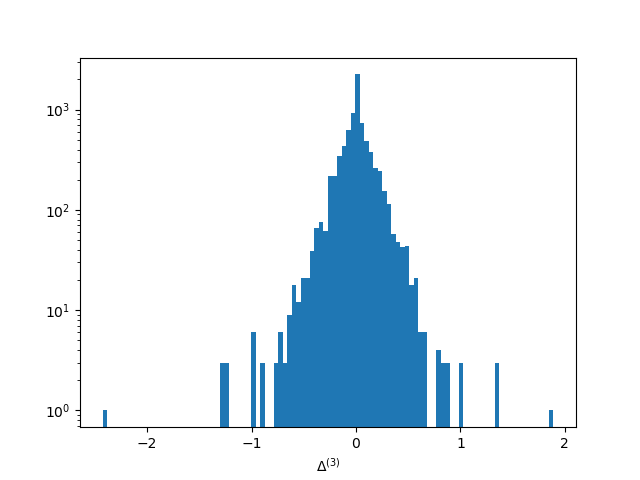

<IPython.core.display.Javascript object>


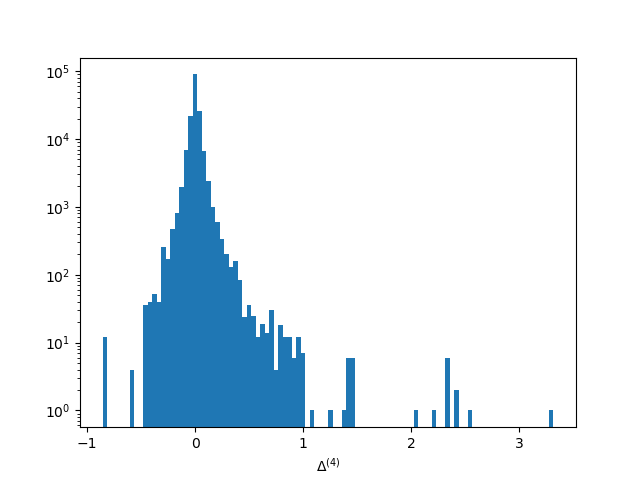

Text(0.5,0,'$\\Delta^{(4)}$')

In [5]:


Bv = np.array(B.T.dot(v)) #edges by modes

D1 = Delta_1(Bv)

plt.figure()
plt.plot(w, D1,'+')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\Delta^{(1)}$')

D3 = Delta_3(Bv)

plt.figure()
plt.hist(D3.flatten(),bins=100,log=True)
plt.xlabel(r'$\Delta^{(3)}$')

D4 = Delta_4(Bv)

plt.figure()
plt.hist(D4.flatten(),bins=100,log=True)
plt.xlabel(r'$\Delta^{(4)}$')


In [6]:
theta_0 = .1*np.random.rand(len(G))
gamma_0 = theta_0.dot(v)
t_max = 10
n_t = 100

result_theta = integ.solve_ivp(lambda t, y: kuramoto_full_theta(t, y, B), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t))
result_gamma = integ.solve_ivp(lambda t, y: kuramoto_full_gamma(t, y, B, v), [0, t_max], gamma_0, t_eval = np.linspace(0, t_max, n_t))

<IPython.core.display.Javascript object>


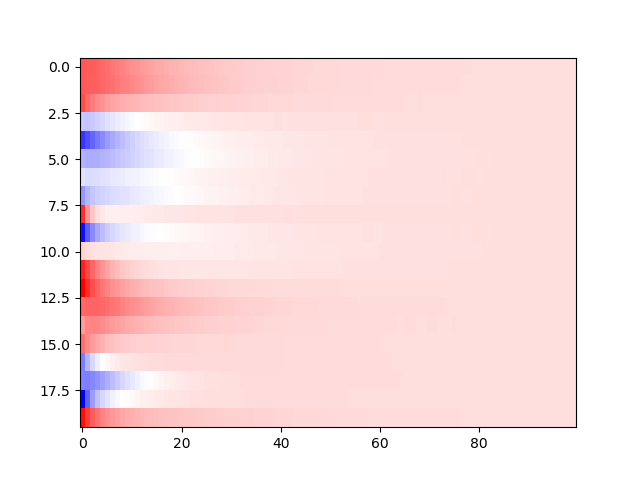

<IPython.core.display.Javascript object>


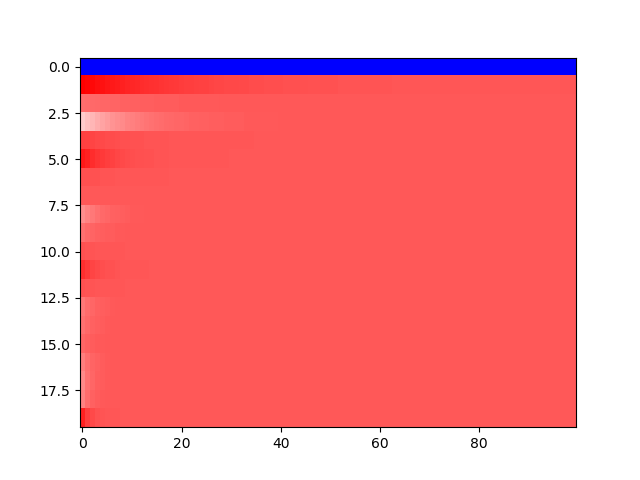

In [7]:
times = result_theta.t
theta = result_theta.y
gamma = result_gamma.y


plt.figure()
plt.imshow(theta, aspect='auto',cmap='bwr')

plt.figure()
plt.imshow(gamma, aspect='auto',cmap='bwr')
